In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

In [2]:
DATADIR= r"C:\Users\Welcome In Hell\dataa"

In [3]:
CATEGORIES= ["Training","Test"]

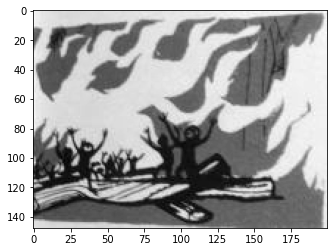

In [4]:
for category in CATEGORIES:
    path  = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [5]:
print(img_array)

[[186 181 179 ... 179 183 180]
 [186 181 179 ... 185 191 183]
 [186 181 178 ... 164 181 174]
 ...
 [169 168 167 ... 147 176 175]
 [170 169 168 ... 149 178 176]
 [170 170 168 ... 151 179 177]]


In [6]:
print(img_array.shape)

(148, 200)


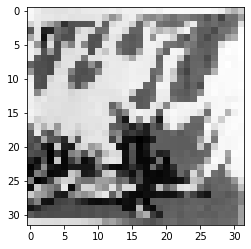

In [7]:
IMG_SIZE=32
new_array = cv2.resize(img_array, ( IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [8]:
training_data=[]
def create_training_data():
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
        except Exception as e:
            pass
        
create_training_data()

In [9]:
print(len(training_data))

2305


In [10]:
import random
random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [12]:
X=[]
y=[]

In [13]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y=np.array(y)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X=X/255.0


model=Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history = model.fit(X, y, batch_size=32, epochs=3, validation_split=0.1)

Train on 2074 samples, validate on 231 samples
Epoch 1/3
2074/2074 [==============================] - 2s 1ms/sample - loss: 0.3760 - accuracy: 0.9846 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/3
2074/2074 [==============================] - 1s 551us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
2074/2074 [==============================] - 1s 562us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


2305/2305 - 0s - loss: 0.0000e+00 - accuracy: 1.0000


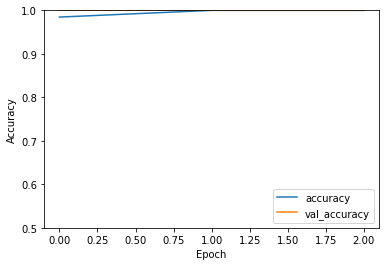

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(X,  y, verbose=2)